In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
from google.colab import files
from sklearn.preprocessing import StandardScaler
import numpy as np

Dataset:

https://www.kaggle.com/datasets/samikshadalvi/pcos-diagnosis-dataset


In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path="/content/drive/MyDrive/ML for Medicine/ML/pcos_dataset.csv"

data = pd.read_csv(file_path)

In [4]:
data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [6]:
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


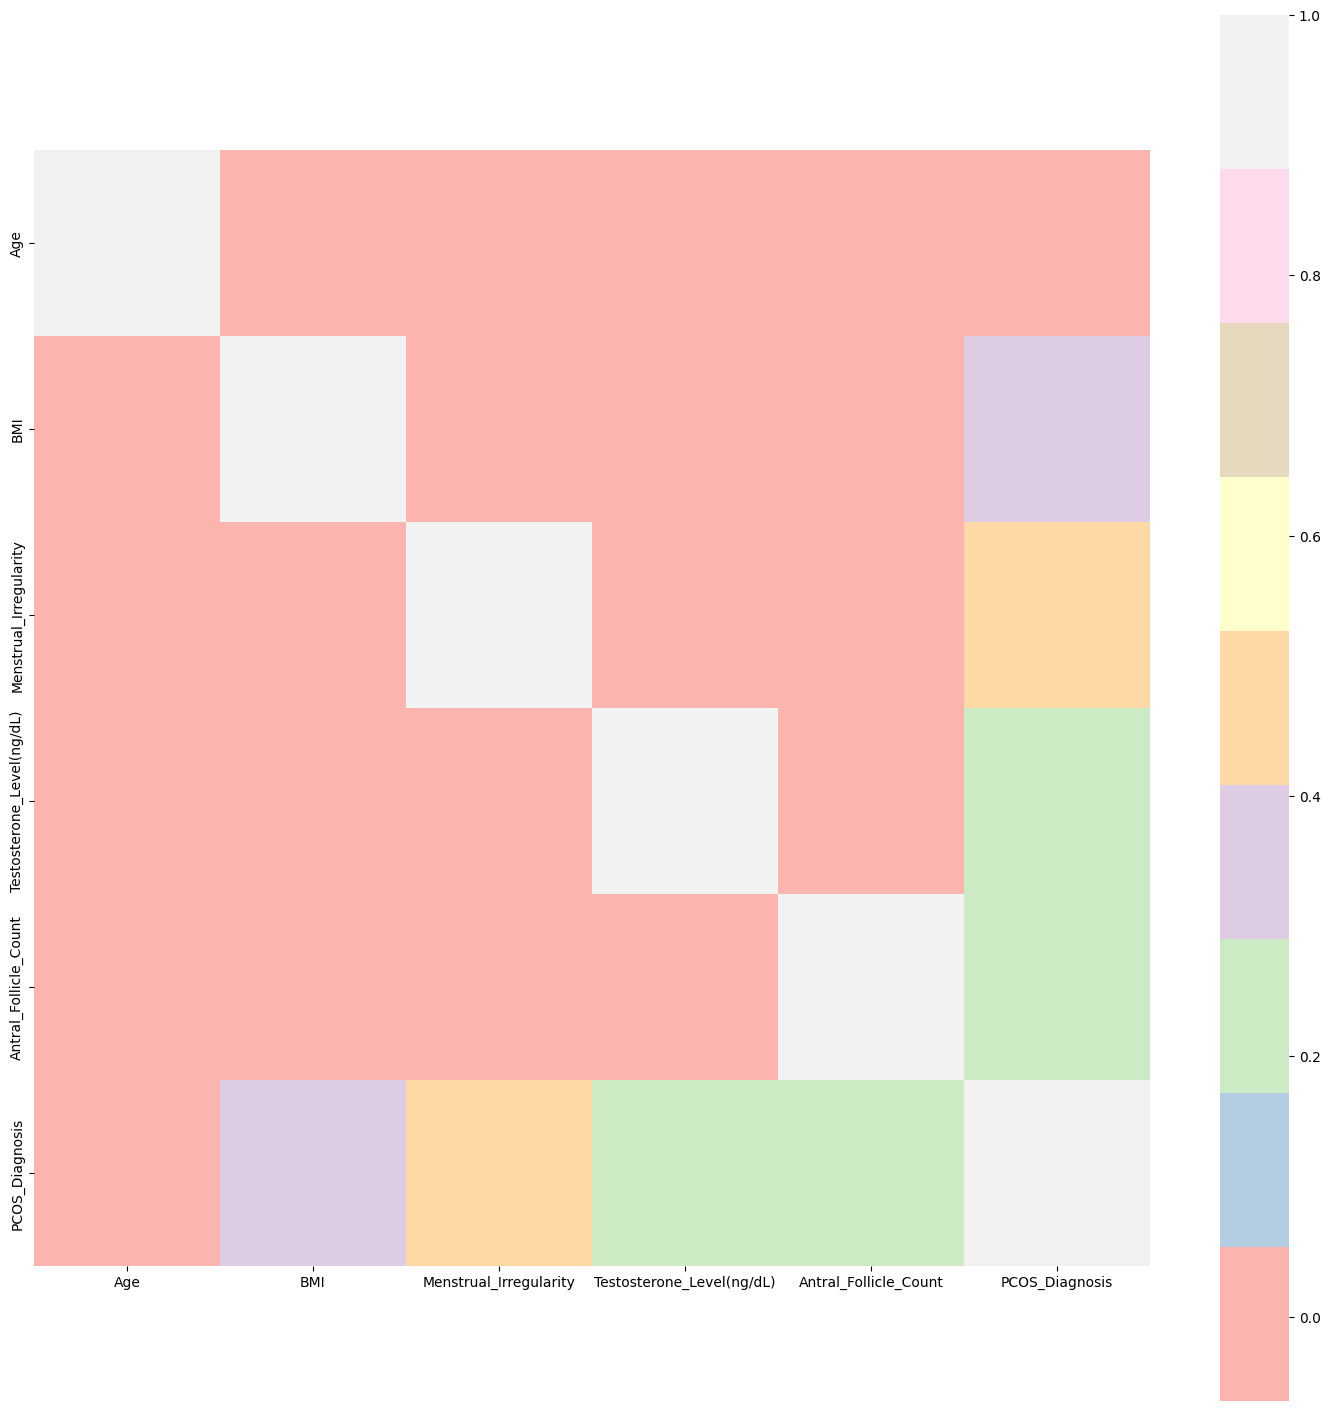

In [7]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [8]:
corrmat["PCOS_Diagnosis"].sort_values(ascending=False)

,PCOS_Diagnosis
PCOS_Diagnosis,1.000000
Menstrual_Irregularity,0.469376
BMI,0.377852
Testosterone_Level(ng/dL),0.200817
Antral_Follicle_Count,0.192014
Age,-0.064675


In [14]:
#splitting data

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['PCOS_Diagnosis'])
trainX = train[['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
trainY = train['PCOS_Diagnosis']

testX = test[['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
testY = test['PCOS_Diagnosis']

In [15]:
#scaling data

scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

In [79]:
model = KNeighborsClassifier(n_neighbors=6, weights = 'distance')  #best model obtained through manual testing
model.fit(trainX_scaled, trainY)

KNeighborsClassifier(n_neighbors=6, weights='distance')

Notes:

The model will first plot all training data (which has 4 predictors) into a 4D space, where each point represents one patient. When we feed a new patient's data, it plots that patient onto the 4D space, and determine its distance with all other neighboring patients. The distances are ranked from closest to farthest. The n_neighbors parameter determines how many of those distances the model will consider when classifying the patient as PCOS/non-PCOS.

Weights is a parameter that determines how a neighber is weighted. "uniform" means all neighbors are weighted equally, where as "distance" weighs the closer neighbors more.

weights='uniform' when:
- Data is noise-free with all k neighbors are likely to belong to the same class.
- Distances to neighbors are relatively uniform across samples.
- No strong local gradients.

weights='distance' when:
- Closer neighbors should matter more
- There's overlap between classes or noise
- You want to reduce the influence of distant but included neighbors
- Using a small k
- Data overlapping (ie same BMI for PCOS and non-PCOS data)

We can also manipulate the metric to calculate the distance in various ways.

In [80]:
predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

Model Accuracy:
0.99 



In [83]:
#finding the best k

k_values = [i for i in range (1,31)]
scores = []
scores_weight_distance = []

X = data[['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
X = scaler.fit_transform(X)
y = data['PCOS_Diagnosis']

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    score = cross_val_score(knn, X, y, cv=5)
    scores_weight_distance.append(np.mean(score))

print("The best value of k (weight = uniform) is :", scores.index(max(scores)), max(scores))
print("The best value of k (weight = distance) is :", scores_weight_distance.index(max(scores_weight_distance)), max(scores_weight_distance))

The best value of k (weight = uniform) is : 23 0.976
The best value of k (weight = distance) is : 20 0.9780000000000001


Notes:

Here we can see how weights = "distance" produced a better result.

Finding the best k requires looping through vaious k values many times and decide on the k with the best accuracy. Here, we don't need to train on pre-split data, we can feed in the entire dataset and the data will split during cross validation.

Cross validation is a process of splitting the dataset into cv folds and testing using the knn model cv times, each setting training and testing as different fold. The accuracy scores obtained from these trials will then be averaged, producing the cross validation score.


Text(0, 0.5, 'Accuracy Score')

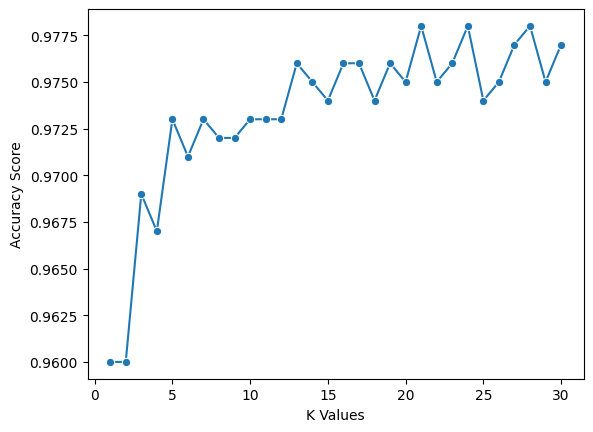

In [72]:
#graphing the k

sns.lineplot(x = k_values, y = scores_weight_distance, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [81]:
#testing with the best k

k = scores_weight_distance.index(max(scores_weight_distance))
model = KNeighborsClassifier(n_neighbors=k+1, weights = 'distance')
model.fit(trainX_scaled, trainY)

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

Model Accuracy:
0.99 

